In [4]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division
from datetime import datetime

In [5]:
from iexfinance import stock
from iexfinance import get_historical_data


In [7]:
start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)

aapl = get_historical_data("AAPL", start=start, end=end, output_format='pandas')
aapl.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,112.6732,113.1889,111.6613,113.0138,28781865
2017-01-04,112.7219,113.3641,112.6246,112.8873,21118116
2017-01-05,112.7900,113.7087,112.6830,113.4614,22193587
2017-01-06,113.6268,114.9695,113.3251,114.7263,31751900
2017-01-09,114.7652,116.2052,114.7554,115.7771,33561948


In [8]:
aapl.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,147.746419,148.686943,146.800893,147.846248,2.707997e+07
std,15.132430,15.209160,14.864272,15.008754,1.128283e+07
min,112.673200,113.188900,111.661300,112.887300,1.402667e+07
25%,138.662250,139.487950,137.816950,138.584050,2.041327e+07
50%,150.129900,151.044000,148.644500,149.768300,2.436148e+07
75%,157.336000,158.281300,156.147800,157.434500,2.952661e+07
max,173.121800,175.188100,172.874700,174.417000,1.119850e+08


In [10]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 5 columns):
open      251 non-null float64
high      251 non-null float64
low       251 non-null float64
close     251 non-null float64
volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


In [ ]:
#1: basic analysis of stock info

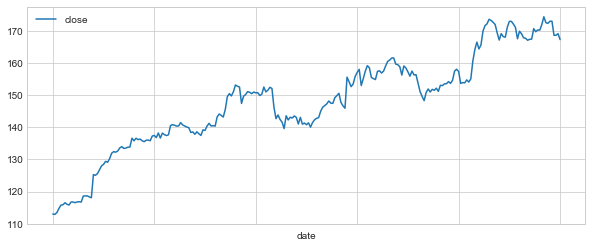

In [11]:
#historical view of closing price
aapl['close'].plot(legend=True,figsize=(10,4))

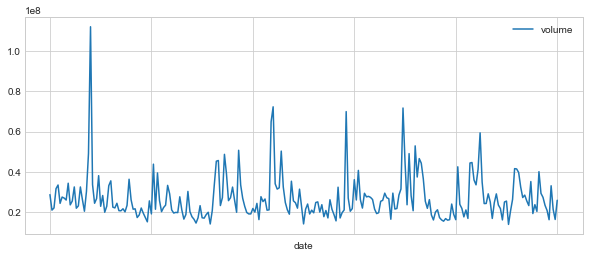

In [13]:
#total volume of stock
aapl['volume'].plot(legend=True,figsize=(10,4))

In [16]:
#calculate moving averages
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    aapl[column_name]=aapl['close'].rolling(ma).mean()

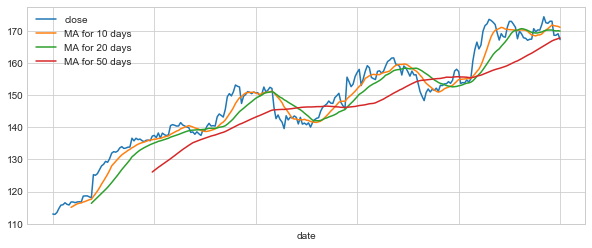

In [18]:
aapl[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(
    subplots=False,figsize=(10,4))

In [19]:
#2: daily return analysis

In [20]:
aapl['daily return']=aapl['close'].pct_change()

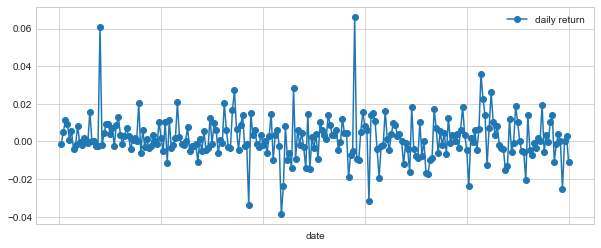

In [21]:
aapl['daily return'].plot(figsize=(10,4),legend=True,marker='o')

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


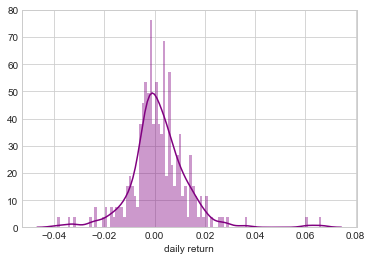

In [22]:
sns.distplot(aapl['daily return'].dropna(),bins=100,color='purple')

In [23]:
goog = get_historical_data("GOOG", start=start, end=end, output_format='pandas')
msft = get_historical_data("MSFT", start=start, end=end, output_format='pandas')
amzn = get_historical_data("AMZN", start=start, end=end, output_format='pandas')

In [24]:
closing_df=DataFrame(index=aapl.index)

In [28]:
closing_df['aapl']=aapl['close']
closing_df['goog']=goog['close']
closing_df['msft']=msft['close']
closing_df['amzn']=amzn['close']

In [29]:
closing_df.head()

,aapl,goog,msft,amzn
date,,,,
2017-01-03,113.0138,786.14,60.4315,753.67
2017-01-04,112.8873,786.90,60.1611,757.18
2017-01-05,113.4614,794.02,60.1611,780.45
2017-01-06,114.7263,806.15,60.6825,795.99
2017-01-09,115.7771,806.65,60.4894,796.92


In [30]:
tech_rets=closing_df.pct_change()

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


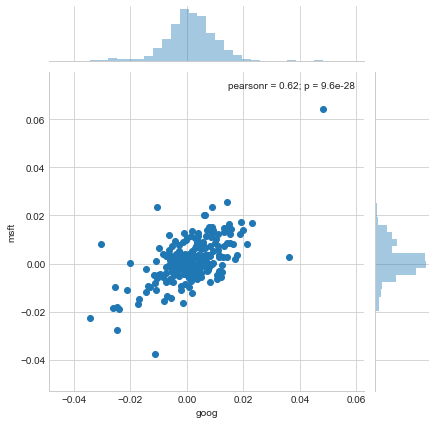

In [31]:
#compare daily returns of goog and msft
sns.jointplot('goog','msft',tech_rets,kind='scatter')

/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


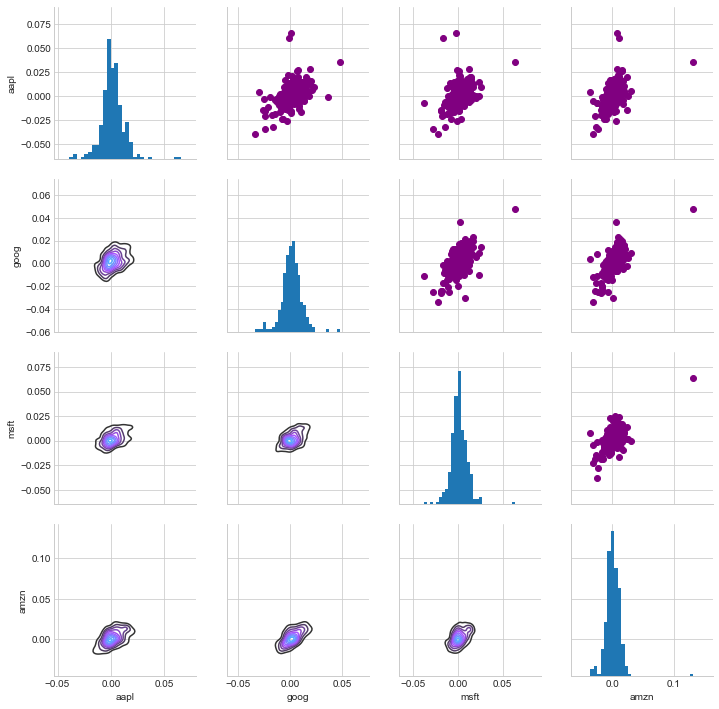

In [34]:
#define pairplot
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

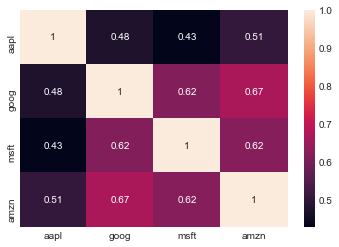

In [41]:
#calculate correlation for daily returns
corr=tech_rets.dropna().corr()
sns.heatmap(corr,annot=True)

In [42]:
#tech companies are positively correlated
#goog and amzn has strongest corr

In [43]:
#3: risk analysis

In [44]:
rets=tech_rets.dropna()

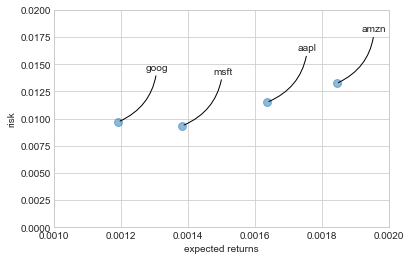

In [56]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.ylim([0,0.02])
plt.xlim([0.001,0.002])

plt.xlabel('expected returns')
plt.ylabel('risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy=(x,y), xytext=(50,50),
    textcoords='offset points', ha='right', va='bottom',
    arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

In [57]:
#define value at risk: expected money to lose for a given CI

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


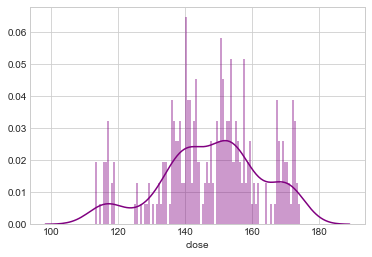

In [58]:
sns.distplot(aapl['close'].dropna(),bins=100,color='purple')

In [59]:
rets['aapl'].quantile(0.05)
#with 95% confidence, worst daily loss will not exceed 1.5%
#with 1 million invest, one-day 5% value at risk is 0.015*1000000

-0.01494900137962627

In [60]:
#value at risk using monte carlo method
#change of price=price*(drift+shock)

In [61]:
days=365
dt=1/365
mu=rets.mean()['goog']
sigma=rets.std()['goog']

In [62]:
def stock_monte_carlo(start_price,days,mu,sigma):
    #define price array
    price=np.zeros(days)
    price[0]=start_price
    
    #shock and drift
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    #run price array
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

Text(0.5,1,'monte carlo analysis for goog')

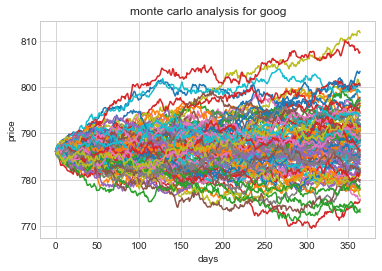

In [64]:
start_price=786.14
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("days")
plt.ylabel("price")
plt.title('monte carlo analysis for goog')

In [65]:
runs=10000

#matrix for each end price per run
simulations=np.zeros(runs)

#set print options of numpy to only display 0-5 points form an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):
    #set the simulation data points as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,u'final price dist for goog after 365 days')

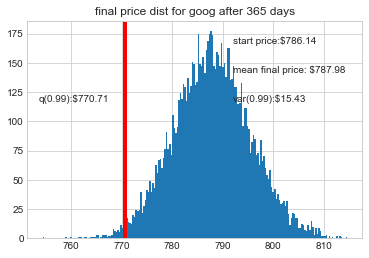

In [67]:
#define q as the 1% empirical quantile, means 99% of the values should fall between here
q = np.percentile(simulations,1)

#plot dist of the end prices
plt.hist(simulations,bins=200)

#fill some additional info
plt.figtext(0.6,0.8,s="start price:$%.2f" %start_price)
plt.figtext(0.6,0.7,"mean final price: $%.2f" %simulations.mean())

#var of the price(within 99% CI)
plt.figtext(0.6,0.6,"var(0.99):$%.2f" %(start_price-q,))

#display 1% quantile
plt.figtext(0.15,0.6,"q(0.99):$%.2f" %q)
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"final price dist for goog after %s days" %days)

In [ ]:
#for every initial stock purchased
#you put about $15.43 at risk 99% of the time from this simulation